In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

(801,)


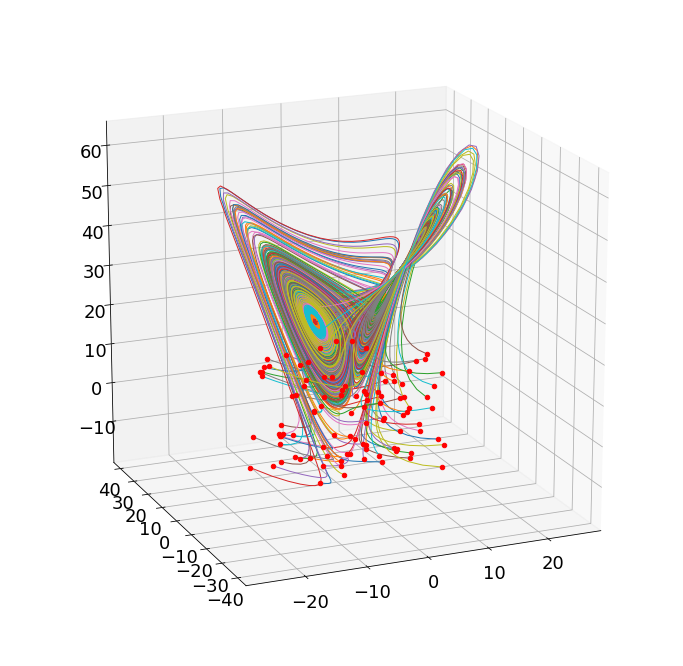

In [40]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
rho = 28

print(t.shape)

nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [41]:
# Build model
deep_approx = keras.models.Sequential()
deep_approx.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
deep_approx.add(layers.Dense(10, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

# Compile model
deep_approx.compile(loss='mse', optimizer='adam')

# Fit!
History = deep_approx.fit(nn_input, nn_output, epochs=1000) 
                          #batch_size=50, 
#            validation_data=(nn_input, nn_output))
#            callbacks=keras.callbacks.EarlyStopping(patience=20))

Epoch 1/1000
2500/2500 [==============================] - ETA: 0s - loss: 125.9875- ETA: 0s - loss: - 1s 462us/step - loss: 122.7699
Epoch 2/1000
2500/2500 [==============================] - 1s 454us/step - loss: 2.4723
Epoch 3/1000
2500/2500 [==============================] - 1s 454us/step - loss: 0.6007
Epoch 4/1000
2500/2500 [==============================] - 1s 456us/step - loss: 0.3077
Epoch 5/1000
2500/2500 [==============================] - 1s 456us/step - loss: 0.1476
Epoch 6/1000
2500/2500 [==============================] - 1s 457us/step - loss: 0.0679
Epoch 7/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0414
Epoch 8/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0325
Epoch 9/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0268
Epoch 10/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0254
Epoch 11/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.

2500/2500 [==============================] - 1s 465us/step - loss: 0.0051
Epoch 94/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0042
Epoch 95/1000
2500/2500 [==============================] - 1s 466us/step - loss: 0.0045
Epoch 96/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0047
Epoch 97/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0053
Epoch 98/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0045
Epoch 99/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0044
Epoch 100/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0044
Epoch 101/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0043
Epoch 102/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0043
Epoch 103/1000
2500/2500 [==============================] - 1s 472us/step - loss: 0.0043
Epoch 104/1000
2500/2500 [================

2500/2500 [==============================] - 1s 462us/step - loss: 0.0032
Epoch 186/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0040
Epoch 187/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0034
Epoch 188/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0036
Epoch 189/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0032
Epoch 190/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0035
Epoch 191/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0036
Epoch 192/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0034
Epoch 193/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0039
Epoch 194/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0036
Epoch 195/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0036
Epoch 196/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 464us/step - loss: 0.0036
Epoch 278/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0034
Epoch 279/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0037
Epoch 280/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0030
Epoch 281/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0034
Epoch 282/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0035
Epoch 283/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0032
Epoch 284/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0040
Epoch 285/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0034
Epoch 286/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0032
Epoch 287/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0031
Epoch 288/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 466us/step - loss: 0.0032
Epoch 370/1000
2500/2500 [==============================] - 1s 466us/step - loss: 0.0030
Epoch 371/1000
2500/2500 [==============================] - 1s 467us/step - loss: 0.0033
Epoch 372/1000
2500/2500 [==============================] - 1s 471us/step - loss: 0.0033
Epoch 373/1000
2500/2500 [==============================] - 1s 470us/step - loss: 0.0030
Epoch 374/1000
2500/2500 [==============================] - 1s 471us/step - loss: 0.0031
Epoch 375/1000
2500/2500 [==============================] - 1s 469us/step - loss: 0.0032
Epoch 376/1000
2500/2500 [==============================] - 1s 468us/step - loss: 0.0030
Epoch 377/1000
2500/2500 [==============================] - 1s 467us/step - loss: 0.0038
Epoch 378/1000
2500/2500 [==============================] - 1s 466us/step - loss: 0.0034
Epoch 379/1000
2500/2500 [==============================] - 1s 466us/step - loss: 0.0034
Epoch 380/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 466us/step - loss: 0.0031
Epoch 462/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0033
Epoch 463/1000
2500/2500 [==============================] - 1s 468us/step - loss: 0.0033
Epoch 464/1000
2500/2500 [==============================] - 1s 468us/step - loss: 0.0031
Epoch 465/1000
2500/2500 [==============================] - 1s 471us/step - loss: 0.0033
Epoch 466/1000
2500/2500 [==============================] - 1s 477us/step - loss: 0.0034
Epoch 467/1000
2500/2500 [==============================] - 1s 474us/step - loss: 0.0032
Epoch 468/1000
2500/2500 [==============================] - 1s 474us/step - loss: 0.0030
Epoch 469/1000
2500/2500 [==============================] - 1s 473us/step - loss: 0.0036
Epoch 470/1000
2500/2500 [==============================] - 1s 474us/step - loss: 0.0031
Epoch 471/1000
2500/2500 [==============================] - 1s 474us/step - loss: 0.0041
Epoch 472/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 465us/step - loss: 0.0028
Epoch 554/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0036
Epoch 555/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0037
Epoch 556/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0033
Epoch 557/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0034
Epoch 558/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0031
Epoch 559/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0027
Epoch 560/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0030
Epoch 561/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0032
Epoch 562/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0030
Epoch 563/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0030
Epoch 564/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 493us/step - loss: 0.0027
Epoch 646/1000
2500/2500 [==============================] - 1s 473us/step - loss: 0.0028
Epoch 647/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0026
Epoch 648/1000
2500/2500 [==============================] - 1s 477us/step - loss: 0.0029
Epoch 649/1000
2500/2500 [==============================] - 1s 475us/step - loss: 0.0034
Epoch 650/1000
2500/2500 [==============================] - 1s 467us/step - loss: 0.0028
Epoch 651/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0029
Epoch 652/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0032
Epoch 653/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0028
Epoch 654/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0031
Epoch 655/1000
2500/2500 [==============================] - 1s 465us/step - loss: 0.0033
Epoch 656/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 461us/step - loss: 0.0032
Epoch 738/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0030
Epoch 739/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0030
Epoch 740/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0037
Epoch 741/1000
2500/2500 [==============================] - 1s 461us/step - loss: 0.0033
Epoch 742/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0030
Epoch 743/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0034
Epoch 744/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0030
Epoch 745/1000
2500/2500 [==============================] - 1s 462us/step - loss: 0.0028
Epoch 746/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0030
Epoch 747/1000
2500/2500 [==============================] - 1s 463us/step - loss: 0.0037
Epoch 748/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 459us/step - loss: 0.0027
Epoch 830/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0028
Epoch 831/1000
2500/2500 [==============================] - 1s 457us/step - loss: 0.0029
Epoch 832/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0029
Epoch 833/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0031
Epoch 834/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0031
Epoch 835/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0027
Epoch 836/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0028
Epoch 837/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0031
Epoch 838/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0028
Epoch 839/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0027
Epoch 840/1000
2500/2500 [==========

2500/2500 [==============================] - 1s 459us/step - loss: 0.0026
Epoch 922/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0029
Epoch 923/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0030
Epoch 924/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0025
Epoch 925/1000
2500/2500 [==============================] - 1s 468us/step - loss: 0.0026
Epoch 926/1000
2500/2500 [==============================] - 1s 464us/step - loss: 0.0052
Epoch 927/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0030
Epoch 928/1000
2500/2500 [==============================] - 1s 458us/step - loss: 0.0028
Epoch 929/1000
2500/2500 [==============================] - 1s 460us/step - loss: 0.0032
Epoch 930/1000
2500/2500 [==============================] - 1s 459us/step - loss: 0.0029
Epoch 931/1000
2500/2500 [==============================] - 1s 457us/step - loss: 0.0026
Epoch 932/1000
2500/2500 [==========

In [42]:
# from tqdm import tqdm
np.random.seed(139)
num_traj = 3

nn_flow = np.zeros((num_traj, len(t), 3))
nn_flow[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
    nn_flow[:, jj+1, :] = deep_approx.predict(nn_flow[:, jj, :])


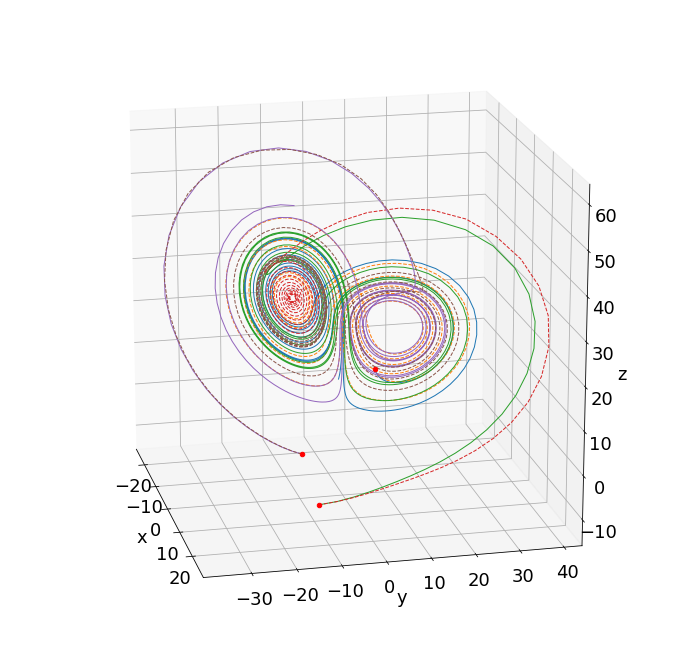

In [43]:
x_t = np.array([integrate.odeint(lorenz_deriv, nn_flow[i, 0, :], t) for i in range(num_traj)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t[j, :, :].T
    xd, yd, zd = nn_flow[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.show()

In [4]:
## Neural Net
import tensorflow as tf


# Define activation functions
def logsig(x):
    return tf.divide(1, (1 + tf.exp(-x)) )

def radbas(x):
    return tf.exp(-x**2)

def purelin(x):
    return x

#create model
model = Sequential()

#add model layers
model.add(Dense(10, input_dim=3, activation=logsig))
model.add(Dense(10, activation=radbas))
model.add(Dense(3, activation=purelin))


# sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer='adam', loss='mse')
model.fit(nn_input, nn_output, epochs=30)

Epoch 1/30
2500/2500 [==============================] - 1s 455us/step - loss: 188.2780
Epoch 2/30
2500/2500 [==============================] - 1s 458us/step - loss: 35.2608
Epoch 3/30
2500/2500 [==============================] - 1s 464us/step - loss: 9.7647
Epoch 4/30
2500/2500 [==============================] - 1s 461us/step - loss: 4.5849
Epoch 5/30
2500/2500 [==============================] - 1s 461us/step - loss: 2.6334
Epoch 6/30
2500/2500 [==============================] - 1s 461us/step - loss: 1.6107
Epoch 7/30
2500/2500 [==============================] - 1s 461us/step - loss: 1.1556
Epoch 8/30
2500/2500 [==============================] - 1s 461us/step - loss: 0.7781
Epoch 9/30
2500/2500 [==============================] - 1s 461us/step - loss: 0.6471
Epoch 10/30
2500/2500 [==============================] - 1s 458us/step - loss: 0.4901
Epoch 11/30
2500/2500 [==============================] - 1s 458us/step - loss: 0.3843
Epoch 12/30
2500/2500 [==============================] - 1s 

In [6]:
# Creating a model
from keras.models import Sequential
from keras.layers import Dense

# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return (K.sigmoid(x) * 5) - 1

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
SpecialActivation (Activatio (None, 32)                0         
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None
